# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

**File Descriptions and Data Field Information**

train.csv

-   The training data, comprising time series of features store_nbr, family, 
    and onpromotion as well as the target sales.

-   **store_nbr** identifies the store at which the products are sold.

-   **family** identifies the type of product sold.

-   **sales** gives the total sales for a product family at a particular store
    at a given date. Fractional values are possible since products can be sold in 
    fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

-   **onpromotion** gives the total number of items in a product family that
    were being promoted at a store at a given date.

test.csv

-   The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

-   The dates in the test data are for the 15 days after the last date in the training data.

transaction.csv

-   Contains date, store_nbr and transaction made on that specific date.

sample_submission.csv

-   A sample submission file in the correct format.

stores.csv

-   Store metadata, including city, state, type, and cluster.

-   cluster is a grouping of similar stores.

oil.csv

-   **Daily oil price** which includes values during both the train and
     test data timeframes. (Ecuador is an oil-dependent country and its
     economical health is highly vulnerable to shocks in oil prices.)

holidays_events.csv

-   Holidays and Events, with metadata

> **NOTE**: Pay special attention to the transferred column. A holiday
> that is transferred officially falls on that calendar day but was
> moved to another date by the government. A transferred day is more
> like a normal day than a holiday. To find the day that it was
> celebrated, look for the corresponding row where type is **Transfer**.
>
> For example, the holiday Independencia de Guayaquil was transferred
> from 2012-10-09 to 2012-10-12, which means it was celebrated on
> 2012-10-12. Days that are type **Bridge** are extra days that are
> added to a holiday (e.g., to extend the break across a long weekend).
> These are frequently made up by the type **Work Day** which is a day
> not normally scheduled for work (e.g., Saturday) that is meant to
> payback the Bridge.
-   Additional holidays are days added a regular calendar holiday, for
    example, as typically happens around Christmas (making Christmas
    Eve a holiday).

**Additional Notes**

-   Wages in the public sector are paid every two weeks on the 15th and
    on the last day of the month. Supermarket sales could be affected
    by this.

-   A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People
    rallied in relief efforts donating water and other first need
    products which greatly affected supermarket sales for several
    weeks after the earthquake.


## Questions

The questions below are to be answered.

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

## Hypothesis

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

     -------------------------------------- 70.9/70.9 MB 422.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [4]:
# Data handling
import pandas as pd
import numpy as np
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

# to remove warnings while importing
import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [5]:
# For CSV, use pandas.read_csv
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
sample_data=pd.read_csv("sample_submission.csv")
store_data=pd.read_csv("stores.csv")
transaction_data=pd.read_csv("transactions.csv")
oil_data=pd.read_csv("oil.csv")
holidays_data=pd.read_csv("holidays_events.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Train

In [6]:
# In time series forecasting, dates must be in the datetime format
train_data["date"] = pd.to_datetime(train_data.date)
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
train_data.shape

(3000888, 6)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [9]:
train_data.isnull().sum()


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [10]:
train_data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [11]:
train_data.corr(numeric_only=True)

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


## Test

In [12]:
# In time series forecasting, dates must be in the datetime format
test_data["date"] = pd.to_datetime(test_data.date)
test_data.head(10)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,1,CELEBRATION,0
7,3000895,2017-08-16,1,CLEANING,25
8,3000896,2017-08-16,1,DAIRY,45
9,3000897,2017-08-16,1,DELI,18


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [14]:
test_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

## Transaction

In [15]:
transaction_data['date']=pd.to_datetime(transaction_data.date)
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [16]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [17]:
transaction_data.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

## Stores

In [18]:
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [19]:
store_data.shape

(54, 5)

In [20]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [21]:
store_data.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

## Oil

In [22]:
oil_data['date']=pd.to_datetime(oil_data.date)
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [23]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [24]:
oil_data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [25]:
oil_data['dcoilwtico'].fillna(method='backfill',inplace=True)

In [26]:
oil_data.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

## Holidays

In [27]:
holidays_data['date']=pd.to_datetime(holidays_data.date)
holidays_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [28]:
holidays_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [29]:
holidays_data.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [30]:
sample_data.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [31]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


## JOIN

In [32]:
# combine the datasets on common columns

merged_file1 = pd.merge(train_data, transaction_data, on=['date', 'store_nbr'])


In [33]:
# Merge Holiday data to previous merged data on date column
merged_file2 = pd.merge(merged_file1, holidays_data, on='date')


In [34]:
# Merge Oil data to previous merged data on date column
merged_file3 = pd.merge(merged_file2, oil_data, on='date')


In [35]:
# Merge Store data to previous merged data on store_nbr column

merged_file4 = pd.merge(merged_file3, store_data, on='store_nbr')

In [36]:
# Preview Merged data
merged_file4.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1


In [37]:
# Rename columns using the rename method
new_data = merged_file4.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [38]:
# Datatypes of new merged data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    322047 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        
 15  store_type    322

In [39]:
# Inspect data for null values
new_data.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
dtype: int64

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

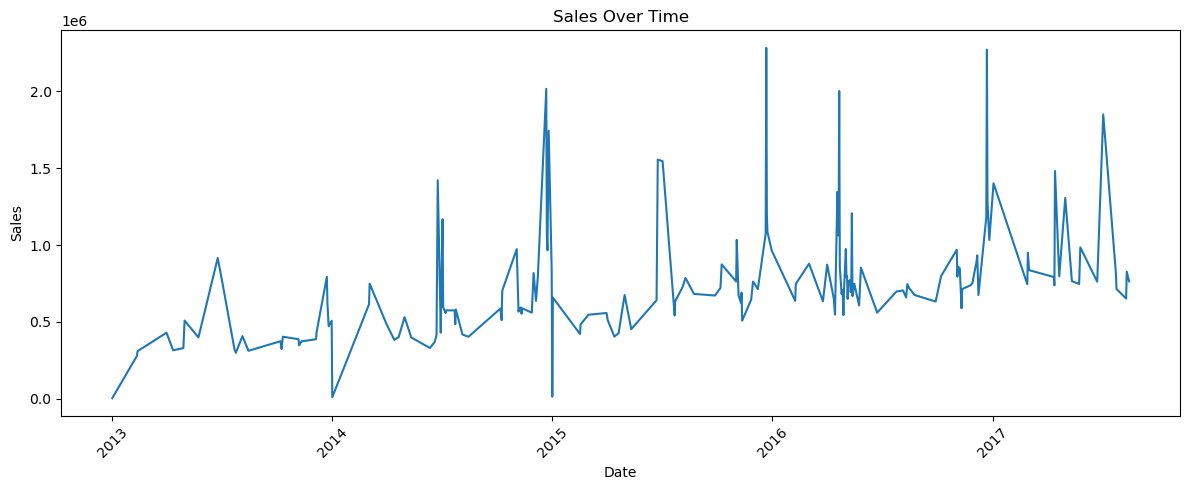

In [40]:
##sales over time
train_data["date"] = pd.to_datetime(train_data.date)
# Group data by date and sum the sales
date_group = new_data.groupby("date").sum(numeric_only=True)

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(date_group.index, date_group["sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### How many stores are in the states?

In [41]:
#stores grouped by States
store_data.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

Text(0.5, 0, 'Count')

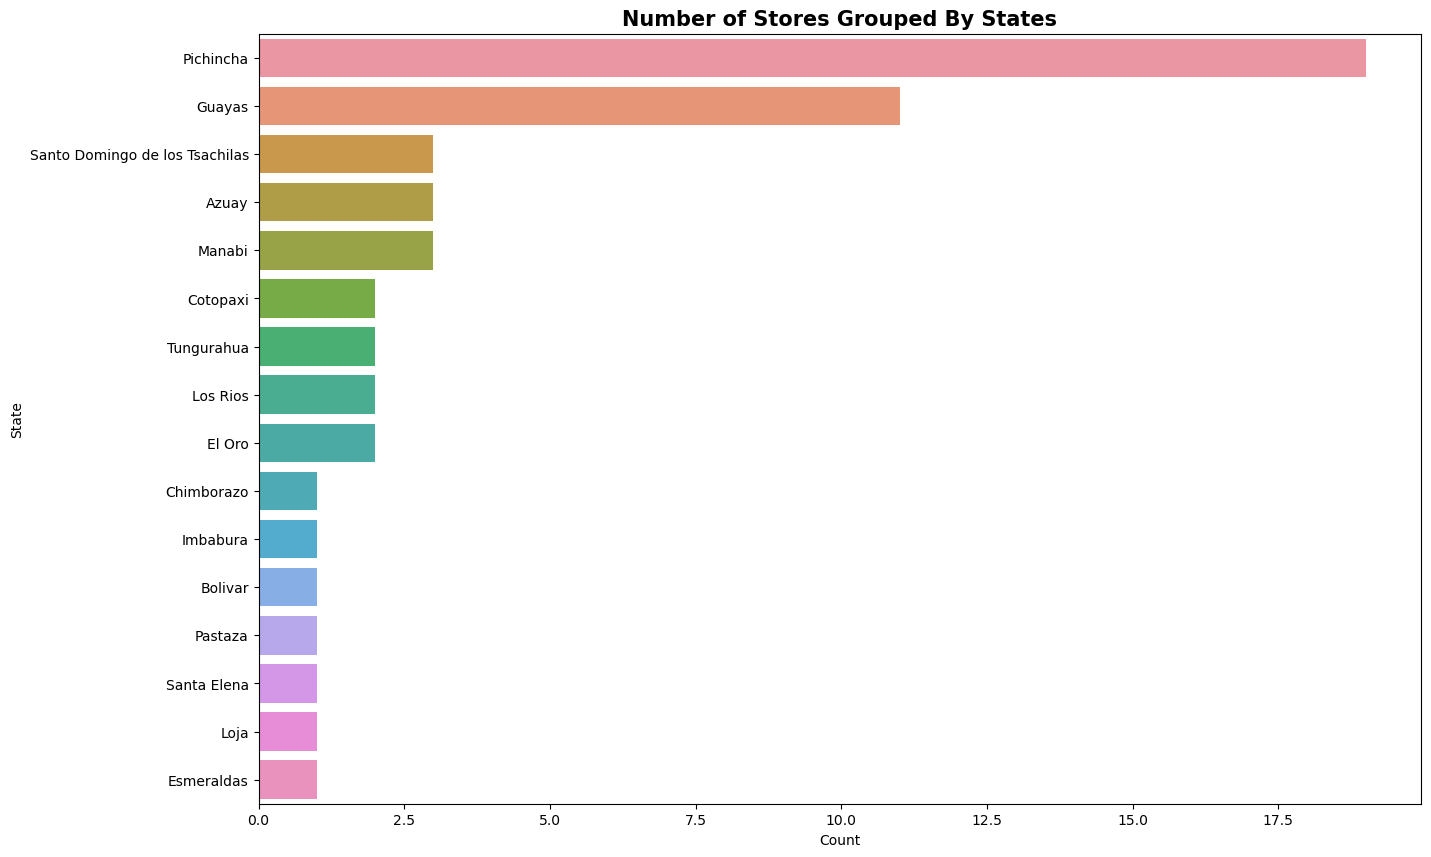

In [42]:
# Visualization of Store States
plt.figure(figsize=(15, 10))
sns.countplot(data=store_data, y='state',order=store_data.state.value_counts().index)
plt.title('Number of Stores Grouped By States',fontweight="bold",fontsize=15)
plt.ylabel('State')
plt.xlabel('Count')

### How many stores are in the cities

In [43]:

#Stores grouped by Cities
store_data.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

Text(0.5, 0, 'Count')

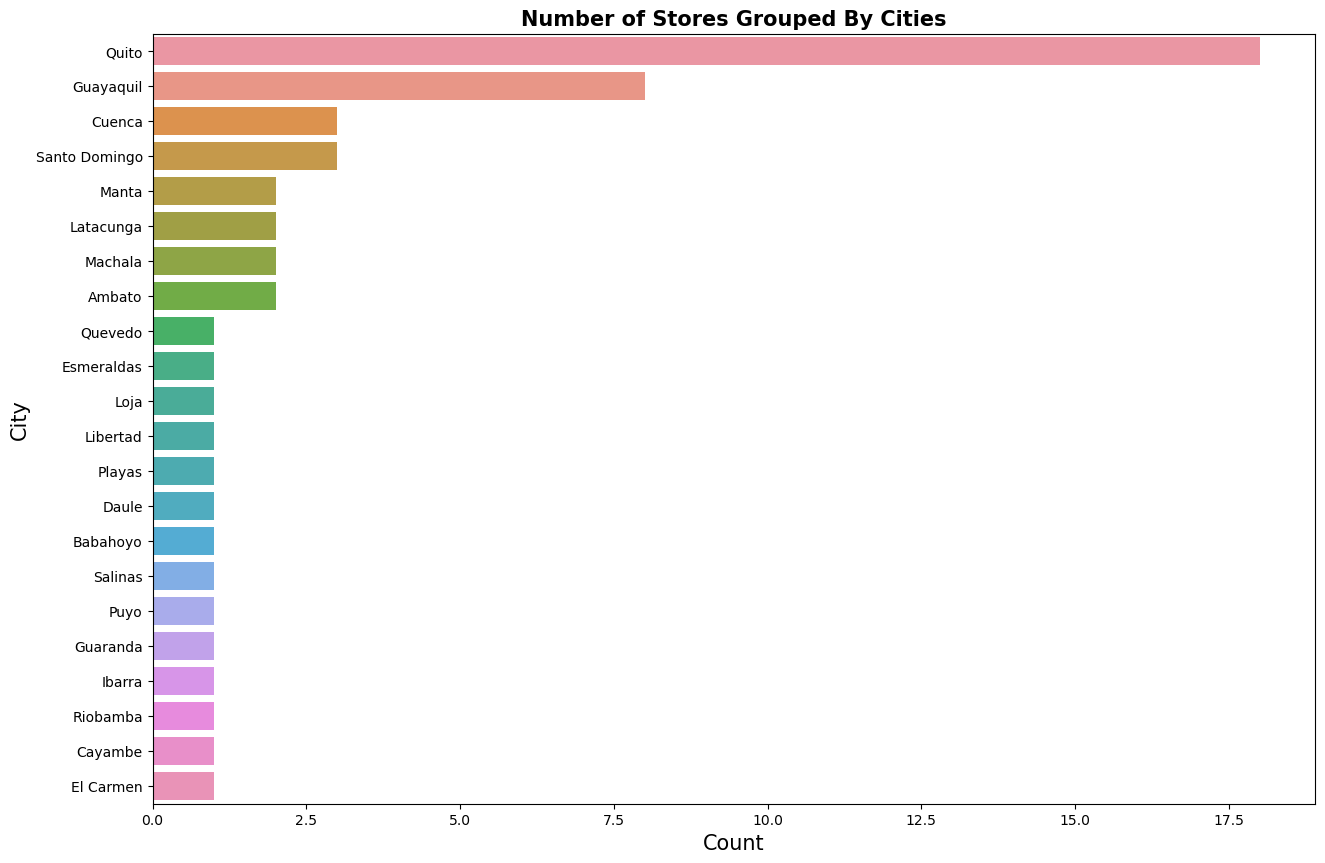

In [44]:
# Visualization of Store by cities
plt.figure(figsize=(15, 10))
sns.countplot(data=store_data, y='city',order=store_data.city.value_counts().index)
plt.title('Number of Stores Grouped By Cities',fontweight="bold",fontsize=15)
plt.ylabel('City', fontsize=15)
plt.xlabel('Count', fontsize=15)

## Sales made by each store from 2013 to 2017

In [45]:
stnbr=new_data.groupby('store_nbr').sum('sales').reset_index()
stnbr.drop(['id','onpromotion','transactions','transferred','dcoilwtico','cluster'], axis=1)

,store_nbr,sales
0,1,1.762220e+06
1,2,2.831383e+06
2,3,5.985505e+06
3,4,2.224350e+06
4,5,1.896103e+06
5,6,2.974784e+06
6,7,3.345915e+06
7,8,3.571102e+06
8,9,3.141671e+06
9,10,1.149936e+06


[Text(0.5, 1.0, 'Total Sales by Stores')]

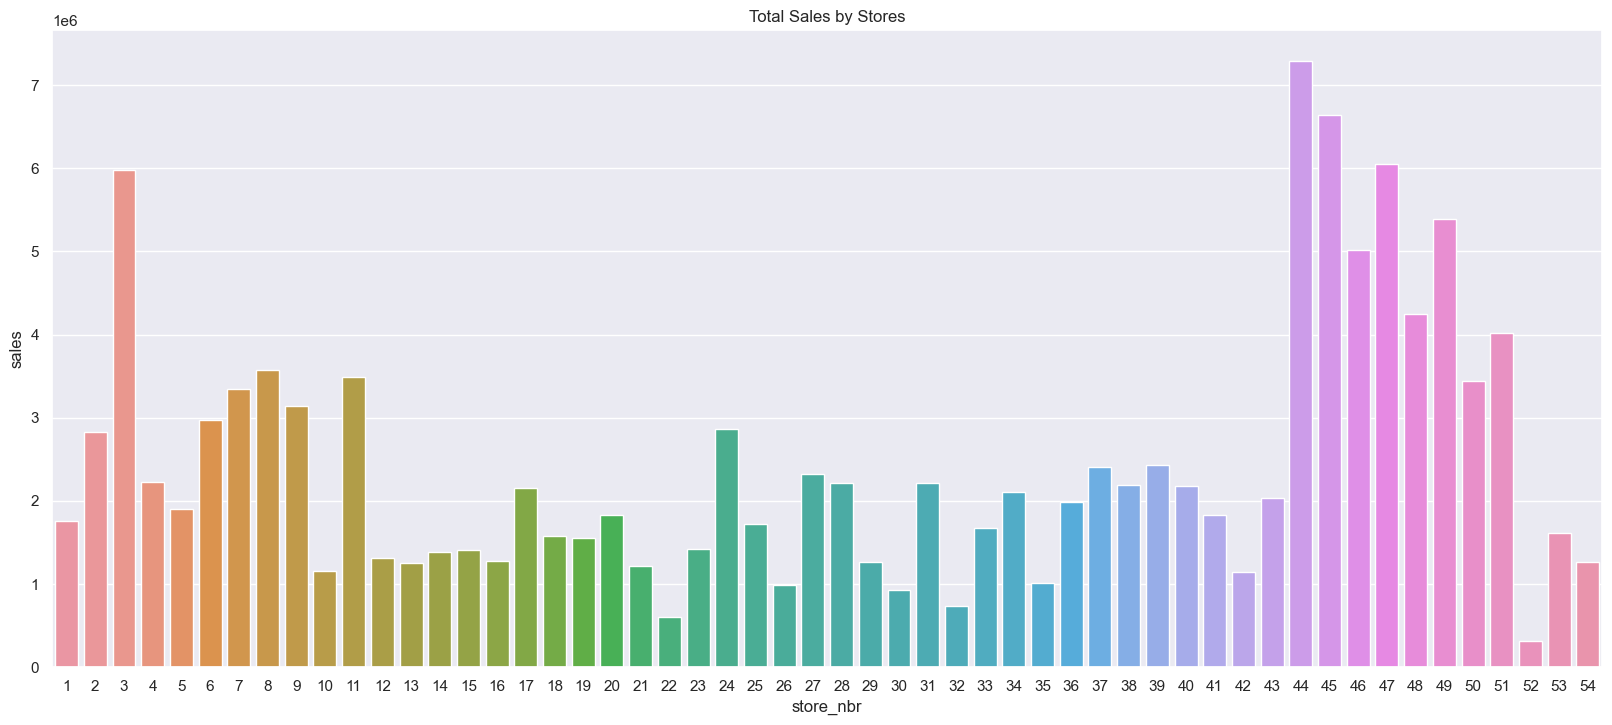

In [46]:

sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data =stnbr).set(title='Total Sales by Stores')

In [47]:
#Convert date column to string
train_data['date']=train_data['date'].astype(str)
#Grouping by year 2017 and sales descending
Y2017 = train_data[train_data['date'].str.contains('2017')].sort_values(by='sales', ascending=False)
Y2017[['date','sales']].head()

,date,sales
2760297,2017-04-02,38422.625
2872134,2017-06-04,24744.000
2758086,2017-04-01,24394.000
2758020,2017-04-01,24134.000
2599488,2017-01-02,23966.000


In [48]:
#Grouping by year 2016 and sales descending
Y2016 = train_data[train_data['date'].str.contains('2016')].sort_values(by='sales', ascending=False)
Y2016[['date','sales']].head()

,date,sales
2163723,2016-05-02,124717.000
2445984,2016-10-07,89576.360
2144154,2016-04-21,87438.516
2139699,2016-04-18,76090.000
2153031,2016-04-26,63434.000


In [49]:
#Grouping by year 2015 and sales descending
Y2015 = train_data[train_data['date'].str.contains('2015')].sort_values(by='sales', ascending=False)
Y2015[['date','sales']].head()

,date,sales
1916586,2015-12-14,40351.46
1898370,2015-12-04,35828.00
1923384,2015-12-18,34454.00
1857219,2015-11-11,33274.00
1929456,2015-12-21,25238.00


In [50]:
#Grouping by year 2014 and sales descending
Y2014 = train_data[train_data['date'].str.contains('2014')].sort_values(by='sales', ascending=False)
Y2014[['date','sales']].head()

,date,sales
1257246,2014-12-08,45361.000
1271832,2014-12-16,37106.000
1269390,2014-12-15,32209.000
1283844,2014-12-23,31851.158
1261635,2014-12-10,31375.500


In [51]:
#Grouping by year 2013 and sales descending
Y2013 = train_data[train_data['date'].str.contains('2013')].sort_values(by='sales', ascending=False)
Y2013[['date','sales']].head()

,date,sales
562596,2013-11-12,46271.0
79674,2013-02-14,26067.0
598236,2013-12-02,22534.0
629949,2013-12-20,22125.0
553686,2013-11-07,22024.0


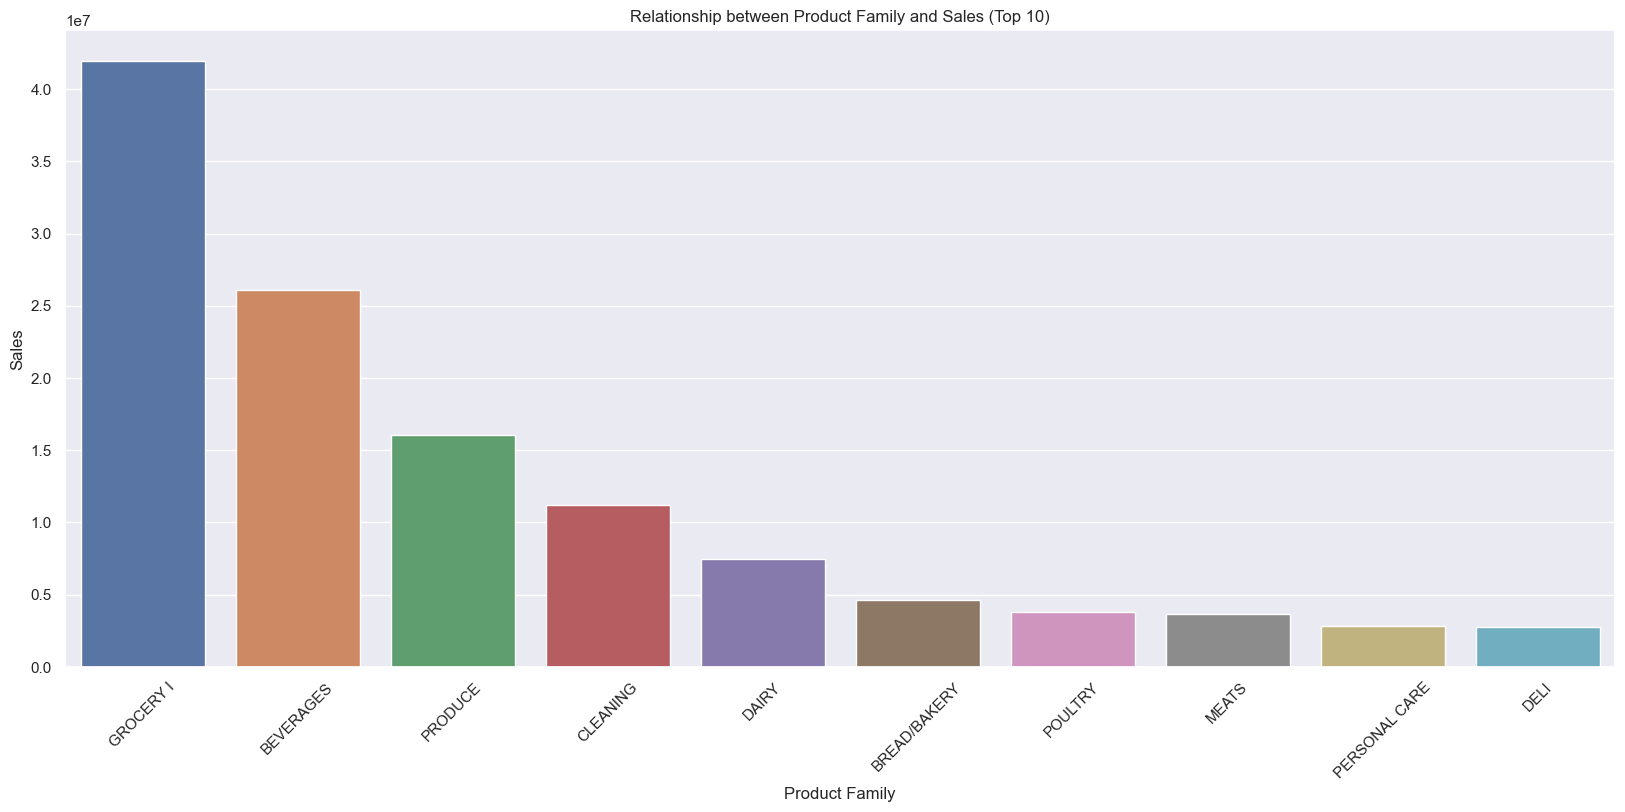

In [52]:

# Group data by product family and sum the sales
grouped_data = new_data.groupby('family').sum(numeric_only=True)['sales']

# Sort the data by sales
grouped_data = grouped_data.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x=grouped_data.index[:10], y=grouped_data.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

In [53]:

corr = new_data.corr(numeric_only=True)
corr

,id,store_nbr,sales,onpromotion,transactions,transferred,dcoilwtico,cluster
id,1.000000,0.013728,0.061237,0.181707,-0.018267,0.133468,-0.827884,-0.018880
store_nbr,0.013728,1.000000,0.051349,0.025992,0.171946,0.001440,-0.010132,-0.075667
sales,0.061237,0.051349,1.000000,0.418029,0.203691,-0.007167,-0.061509,0.033868
onpromotion,0.181707,0.025992,0.418029,1.000000,0.038163,0.028325,-0.133598,0.005895
transactions,-0.018267,0.171946,0.203691,0.038163,1.000000,-0.043902,-0.016547,0.188876
transferred,0.133468,0.001440,-0.007167,0.028325,-0.043902,1.000000,-0.047398,-0.001880
dcoilwtico,-0.827884,-0.010132,-0.061509,-0.133598,-0.016547,-0.047398,1.000000,0.021238
cluster,-0.018880,-0.075667,0.033868,0.005895,0.188876,-0.001880,0.021238,1.000000


[Text(0.5, 1.0, 'Sales vs Transcations')]

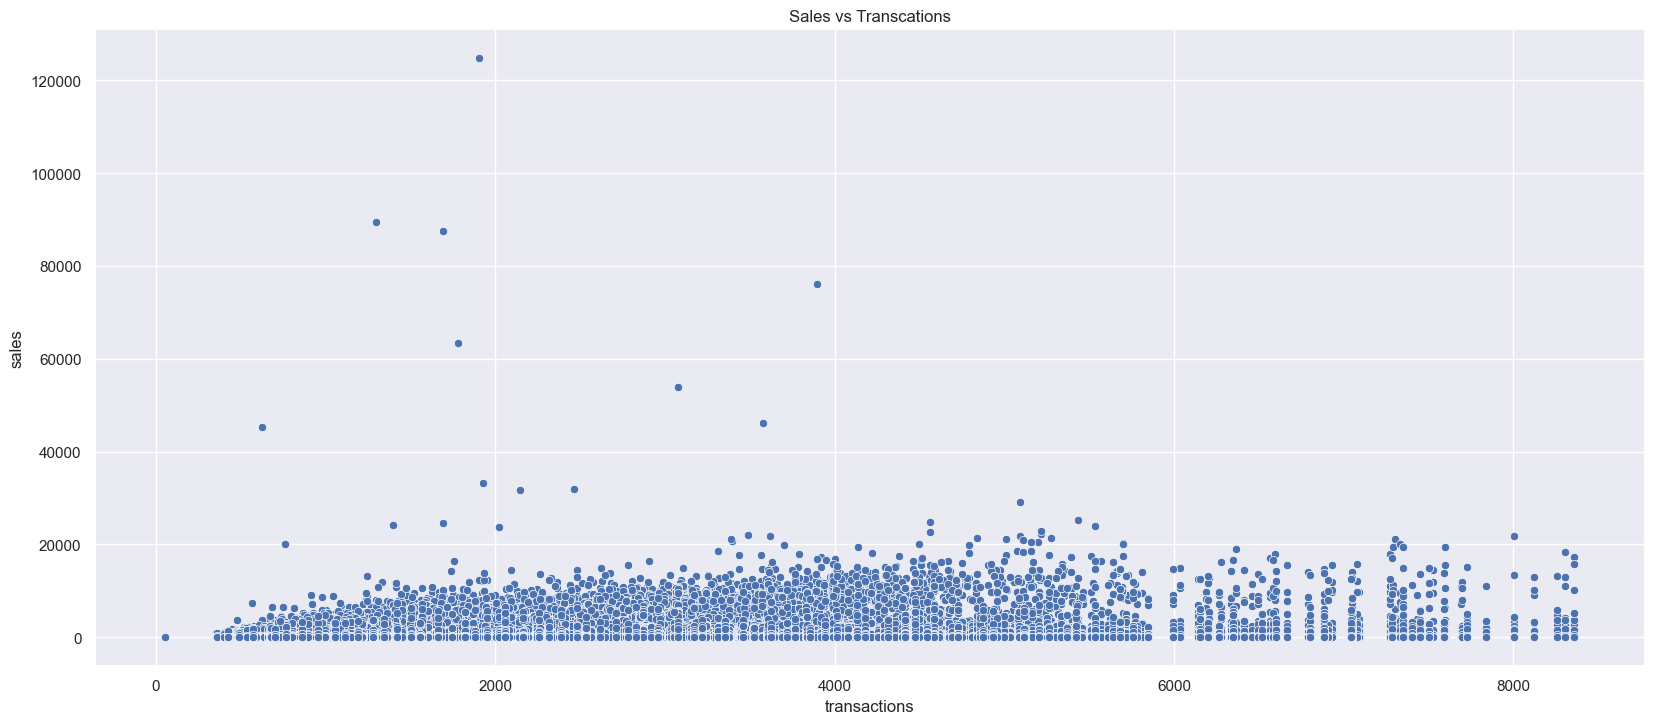

In [54]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.scatterplot(x = "transactions",y = 'sales',data = new_data).set(title='Sales vs Transcations')

[Text(0.5, 1.0, 'Sales vs dcoilwtico')]

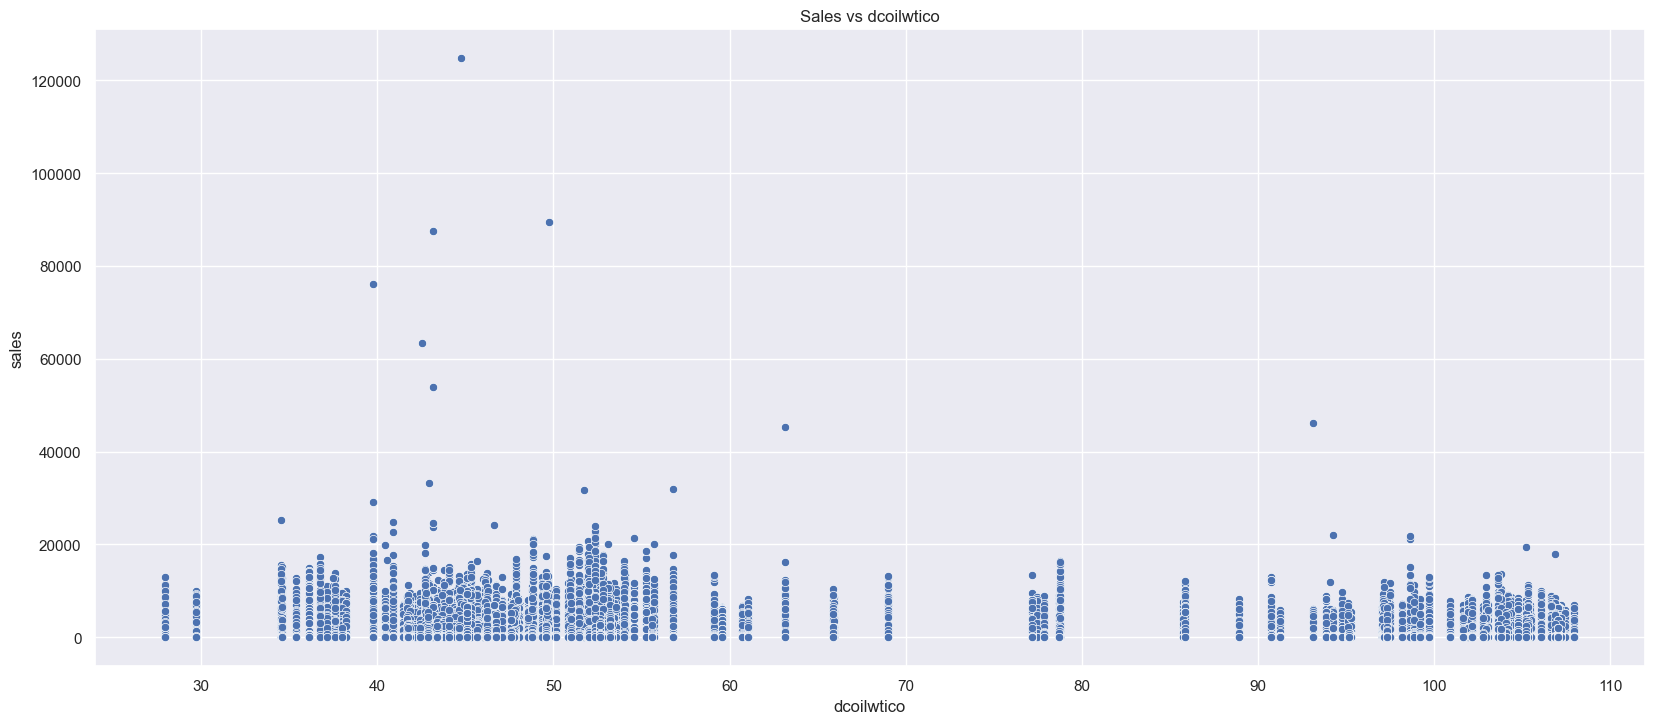

In [57]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.scatterplot(x = "dcoilwtico",y = 'sales',data = new_data).set(title='Sales vs dcoilwtico')

[Text(0.5, 1.0, 'Sales vs Onpromotion')]

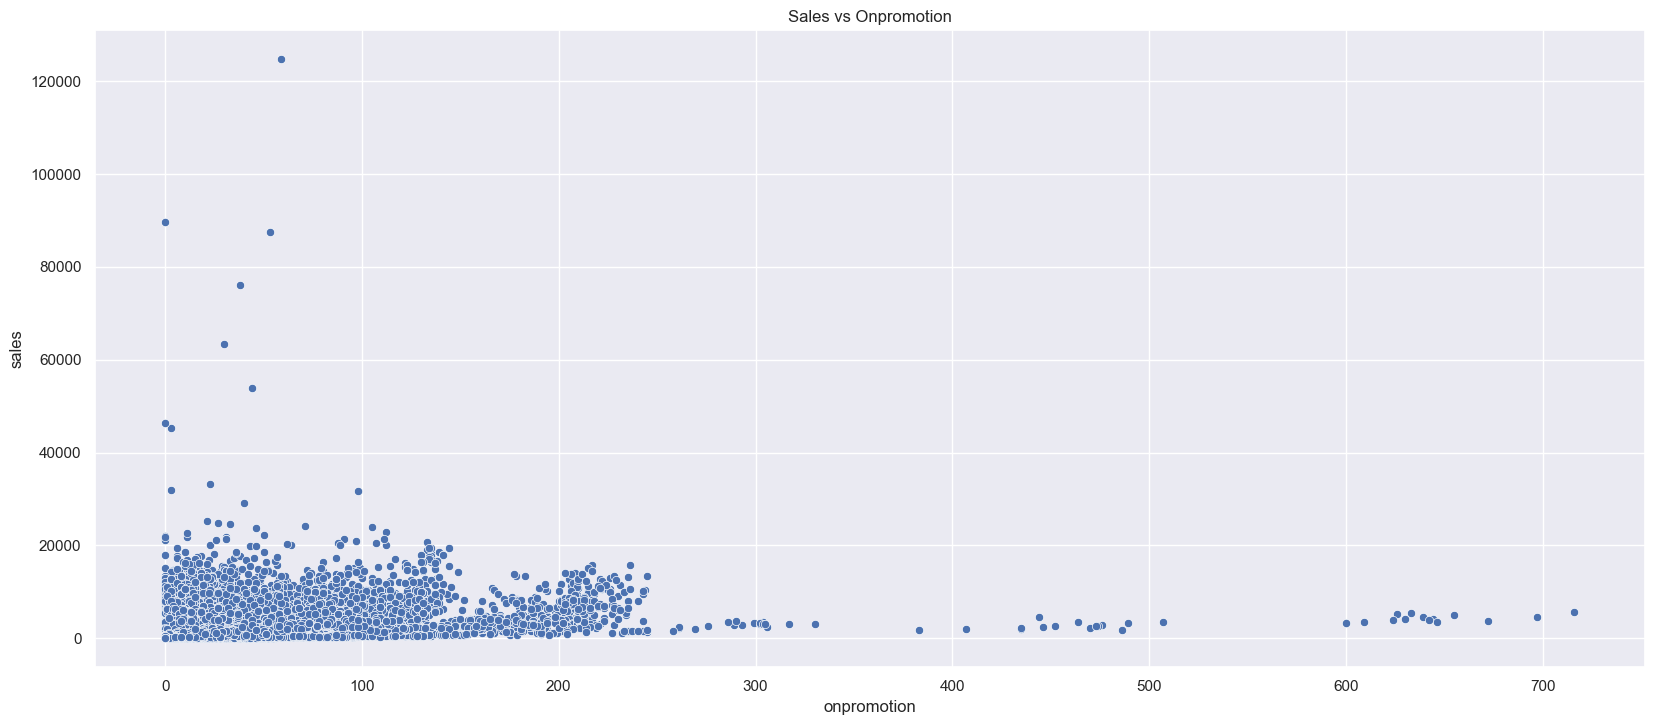

In [58]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.scatterplot(x = "onpromotion",y = 'sales',data = new_data).set(title='Sales vs Onpromotion')

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [59]:
# Use pandas.DataFrame.drop_duplicates metho
#checking duplicates in the train data
new_data.duplicated().sum()

0

## New Features Creation

In [60]:
# Code here#change date datatype as datetime to create new features

new_data.date = pd.to_datetime(new_data.date)


new_data['year'] = new_data.date.dt.year

new_data['month'] = new_data.date.dt.month


new_data['dayofmonth'] = new_data.date.dt.day


new_data['dayofweek'] = new_data.date.dt.dayofweek


new_data['dayname'] = new_data.date.dt.strftime('%A')



In [61]:
# Preview data with new features
new_data.head(10)

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,...,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
1,562,2013-01-01,25,BABY CARE,0.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2,563,2013-01-01,25,BEAUTY,2.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
3,564,2013-01-01,25,BEVERAGES,810.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
4,565,2013-01-01,25,BOOKS,0.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
5,566,2013-01-01,25,BREAD/BAKERY,180.589,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
6,567,2013-01-01,25,CELEBRATION,0.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
7,568,2013-01-01,25,CLEANING,186.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
8,569,2013-01-01,25,DAIRY,143.000,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
9,570,2013-01-01,25,DELI,71.090,0,770,Holiday,National,Ecuador,...,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


In [62]:
#drop unnecessary columns
final_data = new_data.drop(columns=['id','locale', 'locale_name', 'description', 'transferred'], inplace=True)


In [63]:
new_data.head()

,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
0,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
1,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
3,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
4,2013-01-01,25,BOOKS,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


In [64]:
# set the date column as the index
new_data.set_index('date', inplace=True)

In [65]:
new_data.head()

,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
date,,,,,,,,,,,,,,,,
2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BABY CARE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BEAUTY,2.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BOOKS,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


In [66]:
# drop more columns

final_data = new_data.drop(columns=['state',  'store_type', 'dayname'], inplace=True)

In [67]:
final_data = new_data.copy()

In [68]:
final_data

,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,cluster,year,month,dayofmonth,dayofweek
date,,,,,,,,,,,,,
2013-01-01,25,AUTOMOTIVE,0.000,0,770,Holiday,93.14,Salinas,1,2013,1,1,1
2013-01-01,25,BABY CARE,0.000,0,770,Holiday,93.14,Salinas,1,2013,1,1,1
2013-01-01,25,BEAUTY,2.000,0,770,Holiday,93.14,Salinas,1,2013,1,1,1
2013-01-01,25,BEVERAGES,810.000,0,770,Holiday,93.14,Salinas,1,2013,1,1,1
2013-01-01,25,BOOKS,0.000,0,770,Holiday,93.14,Salinas,1,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,52,POULTRY,397.340,0,2255,Holiday,47.57,Manta,11,2017,8,15,1
2017-08-15,52,PREPARED FOODS,104.418,0,2255,Holiday,47.57,Manta,11,2017,8,15,1
2017-08-15,52,PRODUCE,3803.368,8,2255,Holiday,47.57,Manta,11,2017,8,15,1


In [69]:
#Rename dcoilwtico column to oil price
final_data.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

## Features Encoding




In [70]:
# Select the categorical columns
categorical_columns = ["family", "city", "holiday_type"]
categorical_data = final_data[categorical_columns]
columns = list(final_data.columns)
print(columns)

['store_nbr', 'family', 'sales', 'onpromotion', 'transactions', 'holiday_type', 'oil_price', 'city', 'cluster', 'year', 'month', 'dayofmonth', 'dayofweek']


In [71]:
numerical_columns = [i for i in columns if i not in categorical_columns]

In [72]:
numerical_columns.remove('sales')
print(numerical_columns)

['store_nbr', 'onpromotion', 'transactions', 'oil_price', 'cluster', 'year', 'month', 'dayofmonth', 'dayofweek']


In [73]:

from category_encoders.binary import BinaryEncoder

In [74]:
# Instantiate a BinaryEncoder transformer
encoder = BinaryEncoder(drop_invariant=False, return_df=True,)

# Apply the encoder on the categorical data
binary_encoded = encoder.fit(final_data[categorical_columns])

binary_encoded

BinaryEncoder(cols=['family', 'city', 'holiday_type'],
              mapping=[{'col': 'family',
                        'mapping':      family_0  family_1  family_2  family_3  family_4  family_5
 1          0         0         0         0         0         1
 2          0         0         0         0         1         0
 3          0         0         0         0         1         1
 4          0         0         0         1         0         0
 5          0         0         0         1         0         1
 6          0         0         0         1         1         0
 7          0         0         0         1         1         1
 8          0         0         1         0         0         0
 9          0         0         1         0         0         1
 10         0         0         1         0         1         0
 11         0         0         1         0         1         1
 12         0         0         1         1         0         0
 13         0         0         1         1         0         1
 14         0         0         1         1         1         0
 15         0         0         1         1         1         1
 16         0         1         0         0         0         0
 17         0         1         0         0         0         1
 18         0         1         0         0         1         0
 19         0         1         0         0         1         1
 20         0         1         0         1         0         0
 21         0         1         0         1         0         1
 22         0         1         0         1         1         0
 23         0         1         0         1         1         1
 24         0         1         1         0         0         0
 25         0         1         1         0         0         1
 26         0         1         1         0         1         0
 27         0         1         1         0         1         1
 28         0         1         1         1         0         0...
 32         1         0         0         0         0         0
 33         1         0         0         0         0         1
-1          0         0         0         0         0         0
-2          0         0         0         0         0         0},
                       {'col': 'city',
                        'mapping':      city_0  city_1  city_2  city_3  city_4
 1        0       0       0       0       1
 2        0       0       0       1       0
 3        0       0       0       1       1
 4        0       0       1       0       0
 5        0       0       1       0       1
 6        0       0       1       1       0
 7        0       0       1       1       1
 8        0       1       0       0       0
 9        0       1       0       0       1
 10       0       1       0       1       0
 11       0       1       0       1       1
 12       0       1       1       0       0
 13       0       1       1       0       1
 14       0       1       1       1       0
 15       0       1       1       1       1
 16       1       0       0       0       0
 17       1       0       0       0       1
 18       1       0       0       1       0
 19       1       0       0       1       1
 20       1       0       1       0       0
 21       1       0       1       0       1
 22       1       0       1       1       0
-1        0       0       0       0       0
-2        0       0       0       0       0},
                       {'col': 'holiday_type',
                        'mapping':     holiday_type_0  holiday_type_1  holiday_type_2
 1               0               0               1
 2               0               1               0
 3               0               1               1
 4               1               0               0
 5               1               0               1
-1               0               0               0
-2               0               0               0}])

## Features Scaling


In [75]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.
from sklearn.preprocessing import StandardScaler

In [76]:
final_data[numerical_columns].head()

,store_nbr,onpromotion,transactions,oil_price,cluster,year,month,dayofmonth,dayofweek
date,,,,,,,,,
2013-01-01,25,0,770,93.14,1,2013,1,1,1
2013-01-01,25,0,770,93.14,1,2013,1,1,1
2013-01-01,25,0,770,93.14,1,2013,1,1,1
2013-01-01,25,0,770,93.14,1,2013,1,1,1
2013-01-01,25,0,770,93.14,1,2013,1,1,1


In [77]:
# create an instance of StandardScaler
scaler = StandardScaler()

scaler.set_output(transform="pandas")

# fit and transform the numerical columns
scale_nums = scaler.fit(final_data[numerical_columns])
scale_nums

StandardScaler()

In [78]:
# transform the numerical and categorical columns
scale_nums = scaler.transform(final_data[numerical_columns])
binary_encoded = encoder.transform(final_data[categorical_columns])


In [79]:
final_data_encoded = pd.concat([scale_nums, binary_encoded, final_data.sales], axis=1)

In [80]:
final_data_encoded.head()

,store_nbr,onpromotion,transactions,oil_price,cluster,year,month,dayofmonth,dayofweek,family_0,...,family_5,city_0,city_1,city_2,city_3,city_4,holiday_type_0,holiday_type_1,holiday_type_2,sales
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,1,0,0,0,0,1,0,0,1,0.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,0,0,0,0,0,1,0,0,1,0.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,1,0,0,0,0,1,0,0,1,2.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,0,0,0,0,0,1,0,0,1,810.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,1,0,0,0,0,1,0,0,1,0.0


In [81]:
# Make a copy of the final_data_encoded as data
data = final_data_encoded.copy()
data.head()

,store_nbr,onpromotion,transactions,oil_price,cluster,year,month,dayofmonth,dayofweek,family_0,...,family_5,city_0,city_1,city_2,city_3,city_4,holiday_type_0,holiday_type_1,holiday_type_2,sales
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,1,0,0,0,0,1,0,0,1,0.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,0,0,0,0,0,1,0,0,1,0.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,1,0,0,0,0,1,0,0,1,2.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,0,0,0,0,0,1,0,0,1,810.0
2013-01-01,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,-1.613649,-1.970502,-1.491163,-0.666671,0,...,1,0,0,0,0,1,0,0,1,0.0


## Dataset Splitting

In [82]:
# Split Data to train and Test
from sklearn.model_selection import train_test_split

# Create the feature dataframe using the selected columns
X = data.drop(["sales"], axis=1)

# Get the target variable
y = data.sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Create the Model

### Linear Regression Model

In [83]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_test)


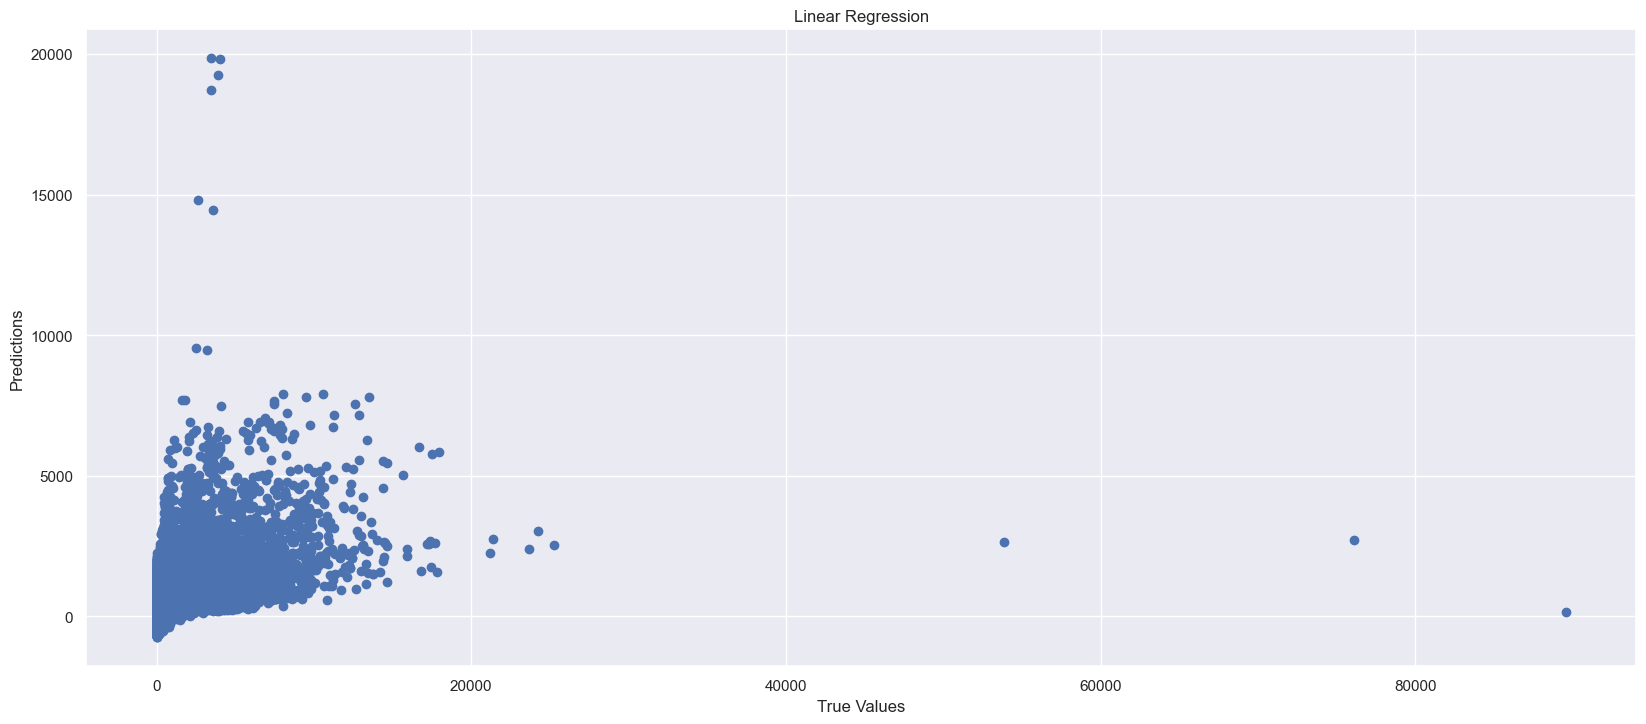

In [84]:

plt.scatter(y_test, lr_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.show()


### Evaluation Metrics for Linear Regression

In [85]:
# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)

In [86]:
# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)


In [87]:
# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)

In [88]:

# Evaluate our models
mse = mean_squared_error(y_test, lr_predictions)
msle = mean_squared_log_error(y_test_abs, lr_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_test, lr_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)

result = pd.DataFrame([['Linear Regression', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
result

,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.177904e+06,11.977674,1085.31,3.46


### Decision Tree Regression Model

### Train the Model

In [89]:
# Decision Tree Regression Model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Make prediction on X_test
dtr_predictions = dtr.predict(X_test)

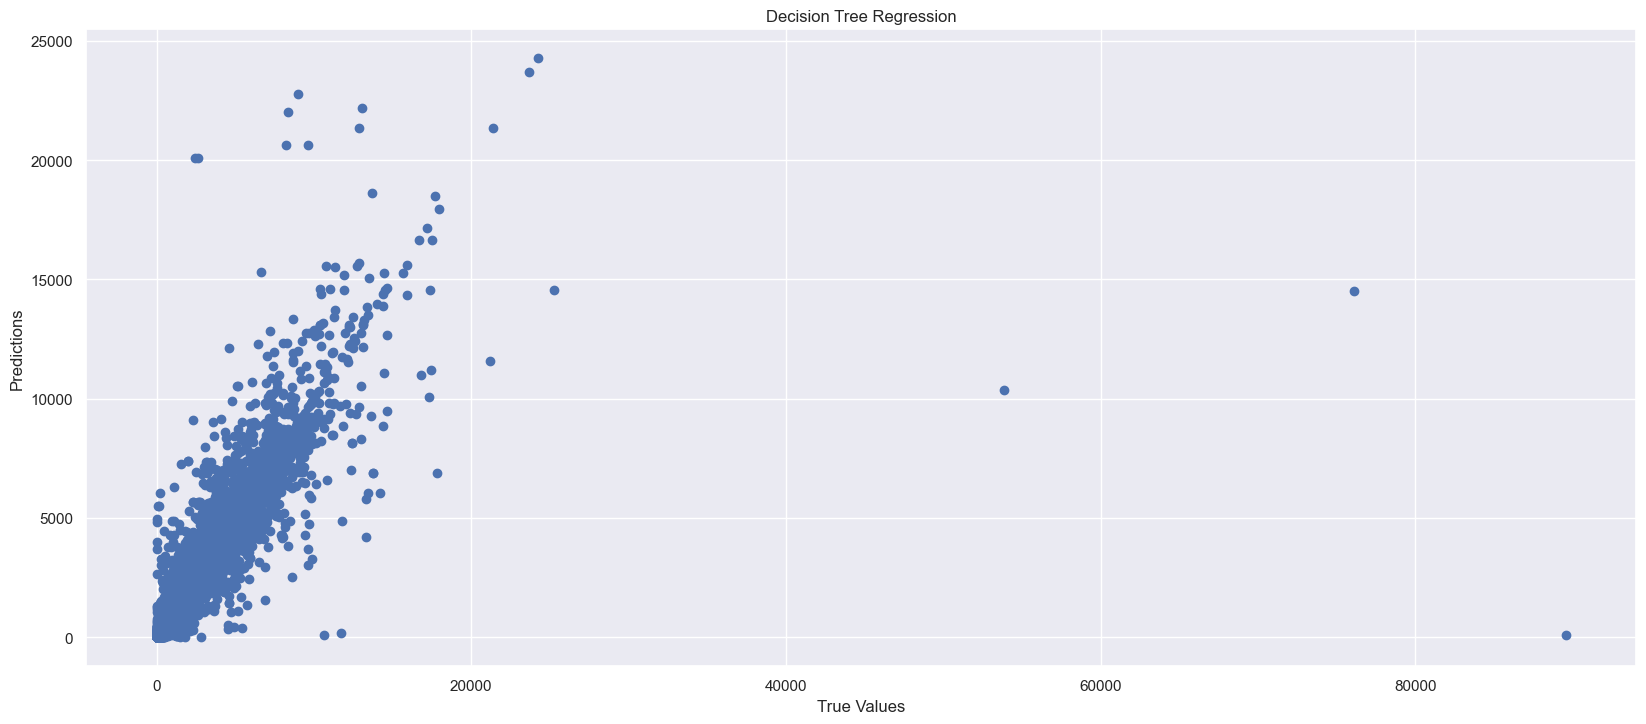

In [90]:
plt.scatter(y_test, dtr_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Decision Tree Regression")
plt.show()

### Evaluation Metrics for Decision Tree Regression

In [91]:
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
dtr_predictions_abs = abs(dtr_predictions)


In [92]:



# Evaluate our models
mse = mean_squared_error(y_test, dtr_predictions)
msle = mean_squared_log_error(y_test_abs, dtr_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_test, dtr_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dtr_predictions_abs)).round(2)

model_result = pd.DataFrame([['Decision Tree', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
result = result.append(model_result, ignore_index = True)
result

,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.177904e+06,11.977674,1085.31,3.46
1,Decision Tree,3.433313e+05,0.343109,585.94,0.59


## XGBoost Model

In [93]:
# import XGBRegressor

from xgboost import XGBRegressor

In [94]:
# XGB Model

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

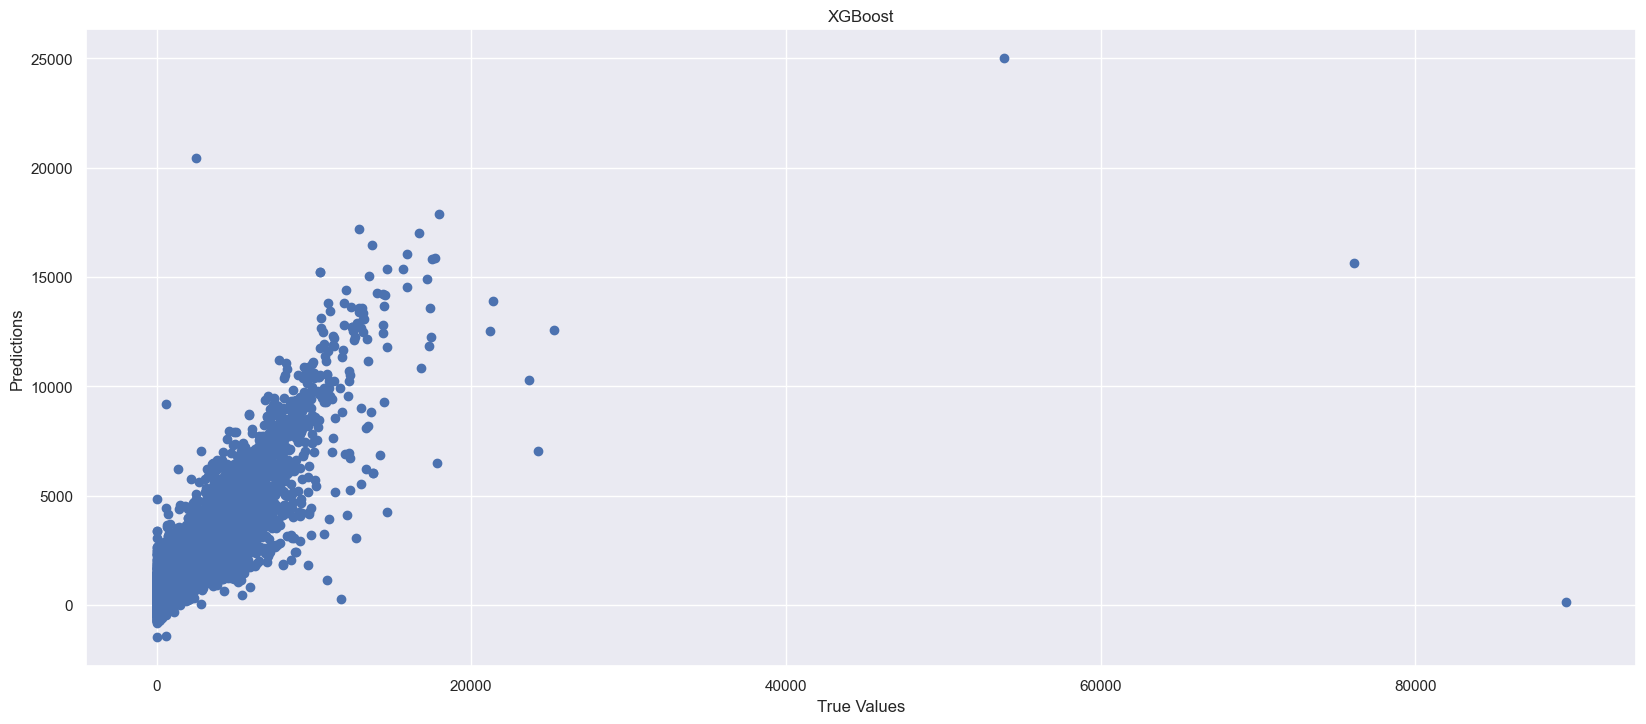

In [95]:
plt.scatter(y_test, xgb_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("XGBoost")
plt.show()

In [96]:
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
xgb_predictions_abs = abs(xgb_predictions)

In [98]:
# Evaluate our models
mse = mean_squared_error(y_test, xgb_predictions)
msle = mean_squared_log_error(y_test_abs, xgb_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, xgb_predictions_abs)).round(2)

model_result = pd.DataFrame([['XGBoost', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
result = result.append(model_results, ignore_index = True)
result

,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.177904e+06,11.977674,1085.31,3.46
1,Decision Tree,3.433313e+05,0.343109,585.94,0.59
2,XGBoost,3.778828e+05,5.306205,614.72,2.30


### Random Forest Regressor Model

In [99]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

# Make prediction on X_test
rf_predictions = rf.predict(X_test)

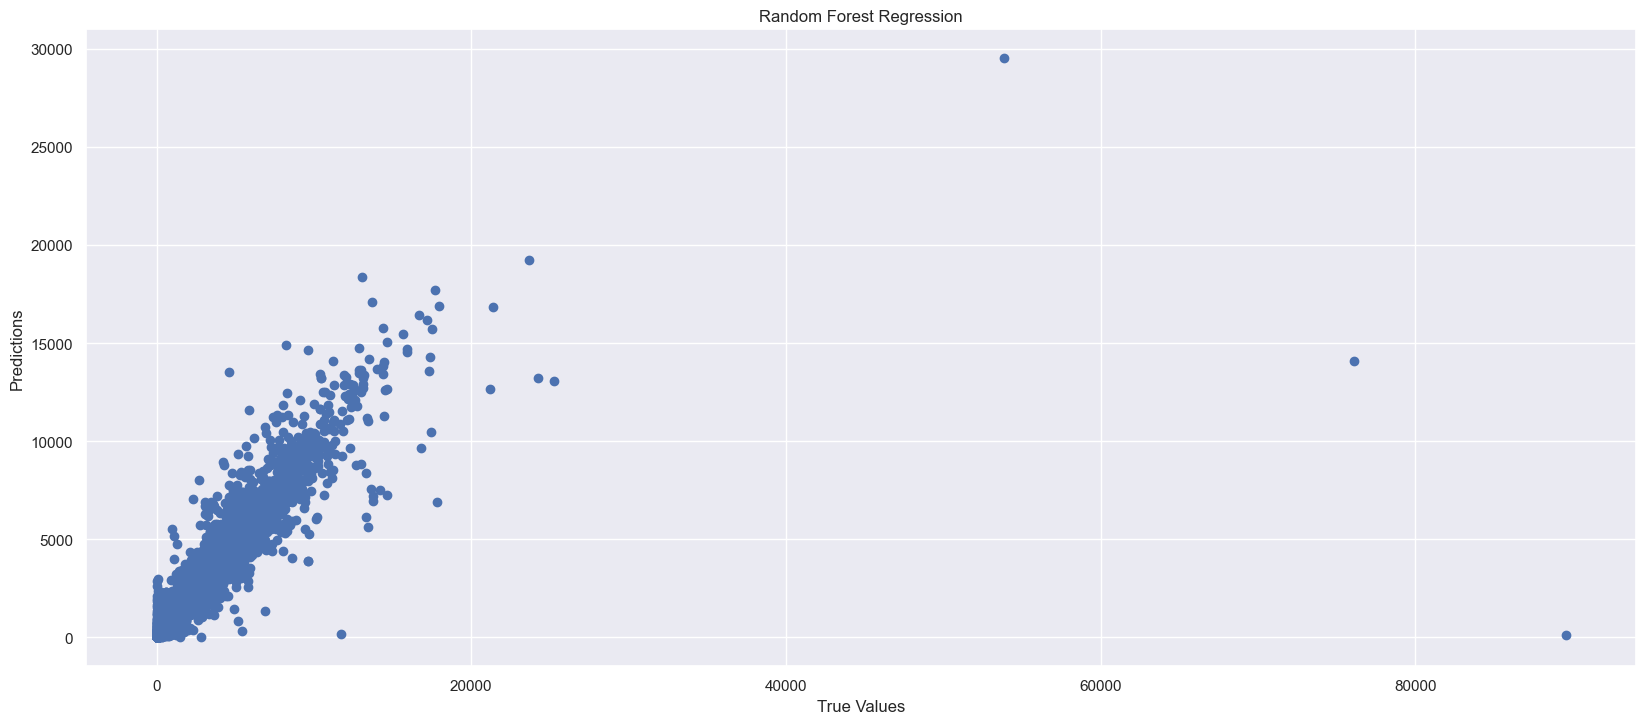

In [100]:
plt.scatter(y_test, rf_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression")
plt.show()

In [101]:
# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)
#rf_rmsle = np.sqrt(mean_squared_error(np.log(y_test), np.log(rf_predictions)))

In [102]:
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
rf_predictions_abs = abs(rf_predictions)


In [103]:
# calculate the mean squared logarithmic error using the new y_test_abs and rf_predictions_abs array

rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

In [104]:
# Evaluate our models
mse = mean_squared_error(y_test, rf_predictions)
msle = mean_squared_log_error(y_test_abs, rf_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

model_result = pd.DataFrame([['Random Forest', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
result = result.append(model_result, ignore_index = True)
result

,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.177904e+06,11.977674,1085.31,3.46
1,Decision Tree,3.433313e+05,0.343109,585.94,0.59
2,XGBoost,3.778828e+05,5.306205,614.72,2.30
3,Random Forest,2.664916e+05,0.264434,516.23,0.51


## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [124]:
result.sort_values('RMSLE')

,Model,MSE,MSLE,RMSE,RMSLE
3,Random Forest,2.664916e+05,0.264434,516.23,0.51
1,Decision Tree,3.433313e+05,0.343109,585.94,0.59
2,XGBoost,3.778828e+05,5.306205,614.72,2.30
0,Linear Regression,1.177904e+06,11.977674,1085.31,3.46
